In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [7]:
df = pd.read_csv(url, sep = '\t')

In [9]:
df.sample(5)

,order_id,quantity,item_name,choice_description,item_price
4461,1778,1,Bottled Water,NaN,$1.50
2560,1013,1,Chips and Guacamole,NaN,$4.45
4528,1800,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$8.75
371,161,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
2213,892,1,Canned Soft Drink,[Lemonade],$1.25


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [19]:
type(df.dtypes)

pandas.core.series.Series

In [17]:
df.dtypes.index

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [18]:
df.dtypes[df.dtypes=='object']

item_name             object
choice_description    object
item_price            object
dtype: object

In [11]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [13]:
df_ob = df[df.dtypes[df.dtypes=='object'].index]
df_ob

,item_name,choice_description,item_price
0,Chips and Fresh Tomato Salsa,NaN,$2.39
1,Izze,[Clementine],$3.39
2,Nantucket Nectar,[Apple],$3.39
3,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...
4617,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [14]:
df_ob.describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


In [31]:
df_ob.isnull().sum()

item_name                0
choice_description    1246
item_price               0
dtype: int64

In [23]:
df_ob['choice_description'].mode()

0    [Diet Coke]
dtype: object

In [30]:
df_ob[df_ob['choice_description'] == "[Diet Coke]"]

,item_name,choice_description,item_price
162,Canned Soda,[Diet Coke],$2.18
200,Canned Soda,[Diet Coke],$1.09
317,Canned Soda,[Diet Coke],$1.09
341,6 Pack Soft Drink,[Diet Coke],$6.49
350,Canned Soda,[Diet Coke],$2.18
...,...,...,...
4527,6 Pack Soft Drink,[Diet Coke],$6.49
4545,Canned Soft Drink,[Diet Coke],$1.25
4571,Canned Soft Drink,[Diet Coke],$1.25
4585,Canned Soft Drink,[Diet Coke],$1.25


In [33]:
df_ob["choice_description"] = df_ob["choice_description"] .fillna("[Diet Coke]")

<ipython-input-33-9818c0446f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ob["choice_description"] = df_ob["choice_description"] .fillna("[Diet Coke]")


In [34]:
df_ob["choice_description"] .isnull().sum()

0

In [42]:
df_ob["Bill"]=[float(i[1:]) for i in df_ob["item_price"]]


<ipython-input-42-a1ee8a2b3a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ob["Bill"]=[float(i[1:]) for i in df_ob["item_price"]]


In [44]:
df_ob.drop("item_price",axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df_ob

,item_name,choice_description,Bill
0,Chips and Fresh Tomato Salsa,[Diet Coke],2.39
1,Izze,[Clementine],3.39
2,Nantucket Nectar,[Apple],3.39
3,Chips and Tomatillo-Green Chili Salsa,[Diet Coke],2.39
4,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...
4617,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [47]:
df_ob["Bill"].max()

44.25

{'whiskers': [<matplotlib.lines.Line2D at 0x21338722fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2133a2a7e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21338ec6280>],
 'medians': [<matplotlib.lines.Line2D at 0x2133a1affd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21337f36af0>],
 'means': []}

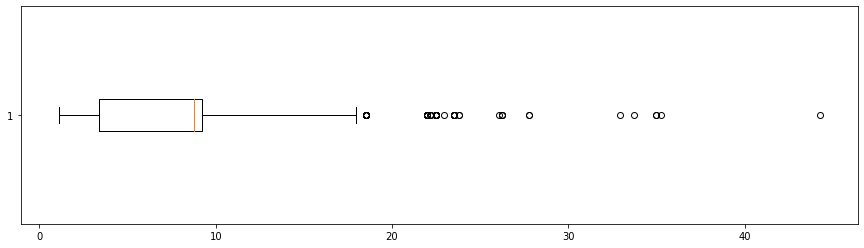

In [54]:
plt.figure(figsize=(15,4))
plt.boxplot(df_ob["Bill"],vert=False)